✅ Saved: plots/BERT_Accuracy_Comparison.png
✅ Saved: plots/BERT_F1_Comparison.png
✅ Saved: plots/BERT_Loss_Comparison.png


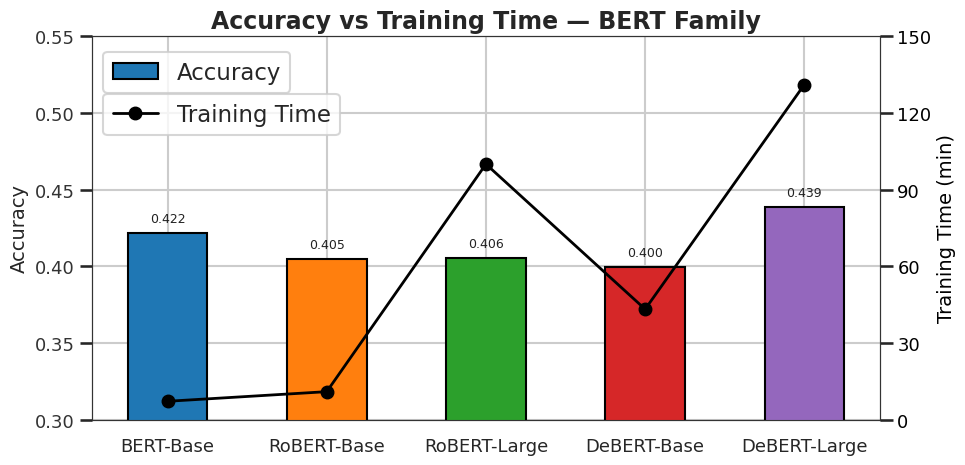

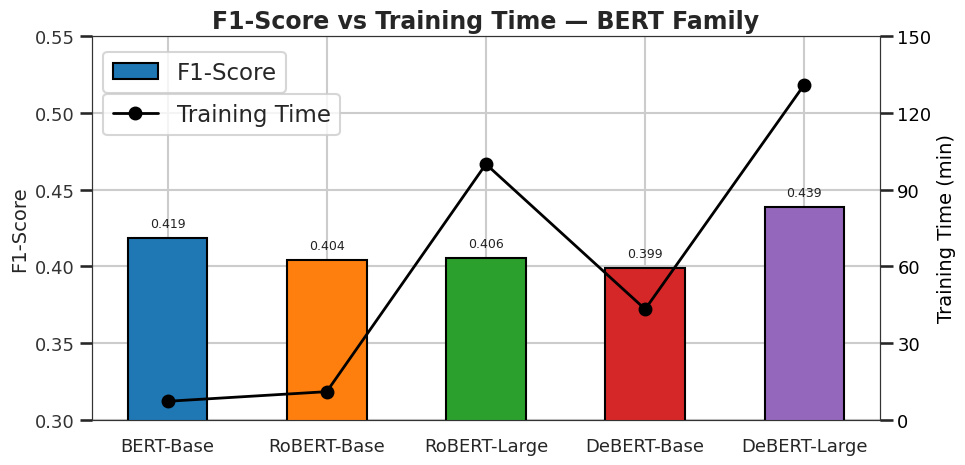

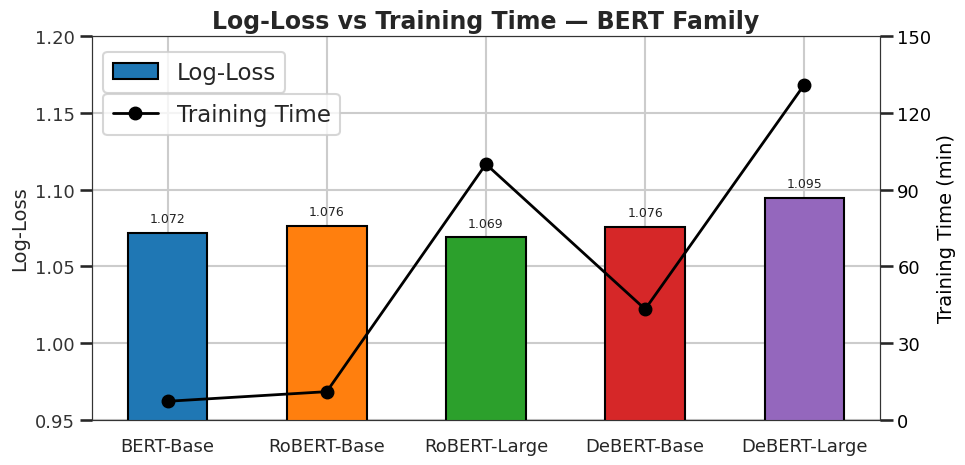

In [44]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Load CSV ===
df = pd.read_csv("metrics_bert.csv")

# === 1.1 Convert Time (seconds → minutes) ===
df["Time"] = df["Time"] / 60.0  # convert to minutes

# === 2. Output folder ===
os.makedirs("plots", exist_ok=True)

# === 3. Global style ===
sns.set_theme(style="whitegrid", context="talk")
plt.rcParams["axes.axisbelow"] = True
plt.rcParams.update({
    "figure.figsize": (10, 5),
    "axes.edgecolor": "#333333",
    "axes.linewidth": 0.8,
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "xtick.labelsize": 13,
    "ytick.labelsize": 13
})

# === 4. Colors ===
base_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]  # one per model

# === 5. Plot helper ===
def plot_metric(metric_name, ylabel, save_name):
    fig, ax1 = plt.subplots(figsize=(10, 5))
    x = range(len(df))
    colors = base_palette[:len(df)]

    # === Bar plot for the metric ===
    bars = ax1.bar(x, df[metric_name], color=colors, edgecolor="black", width=0.5, label=metric_name)
    ax1.set_axisbelow(True)
    for bar in bars:
        bar.set_zorder(3)
        h = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2, h + 0.005, f"{h:.3f}",
                 ha="center", va="bottom", fontsize=9, color="#222222")

    ax1.set_ylabel(ylabel, fontsize=14)
    ax1.set_xticks(x)
    ax1.set_xticklabels(df["Model"])
    ax1.tick_params(axis='y', labelcolor="#333333")

    # === Set y-axis range for metric (optional) ===
    if metric_name in ["Accuracy", "F1-Score"]:
        ax1.set_ylim(0.30, 0.55)
    elif metric_name == "Log-Loss":
        ax1.set_ylim(0.95, 1.20)

    # === Secondary axis for time (in minutes) ===
    ax2 = ax1.twinx()
    ax2.grid(False)
    ax2.plot(x, df["Time"], color="black", marker="o", linewidth=2, label="Training Time")
    ax2.set_ylabel("Training Time (min)", fontsize=14, color="black")
    ax2.tick_params(axis='y', labelcolor="black")

    # === Set y-axis range for time ===
    ax2.set_yticks(range(0, 151, 30))

    # === Title and layout ===
    plt.title(f"{metric_name} vs Training Time — BERT Family", weight="bold", fontsize=17)
    fig.tight_layout()

    ax1.legend(loc="upper left", bbox_to_anchor=(0, 0.99))
    ax2.legend(loc="upper left", bbox_to_anchor=(0, 0.88))

    save_path = f"plots/{save_name}.png"
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    print(f"✅ Saved: {save_path}")

# === 6. Generate plots ===
plot_metric("Accuracy", "Accuracy", "BERT_Accuracy_Comparison")
plot_metric("F1-Score", "F1-Score", "BERT_F1_Comparison")
plot_metric("Log-Loss", "Log-Loss", "BERT_Loss_Comparison")

✅ Saved: plots/BERT_Accuracy_Comparison.png
✅ Saved: plots/BERT_F1_Comparison.png
✅ Saved: plots/BERT_Loss_Comparison.png


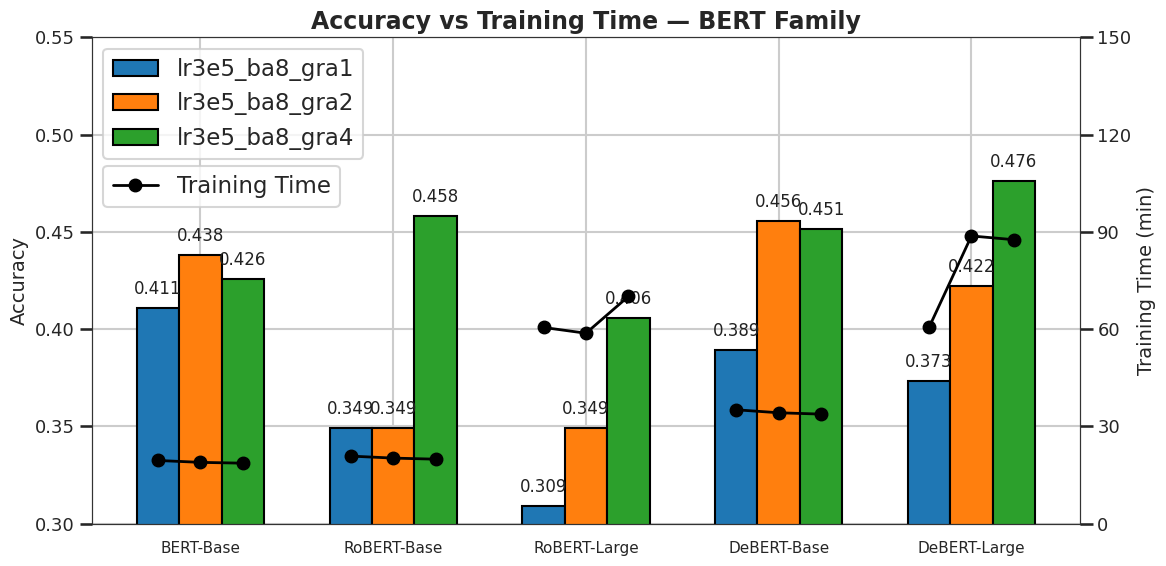

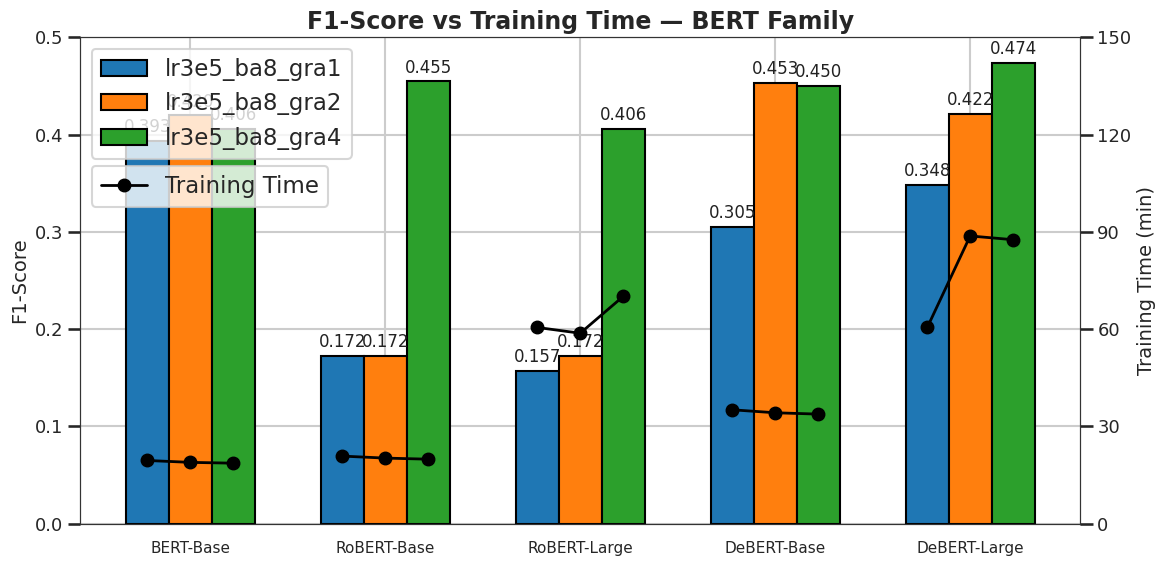

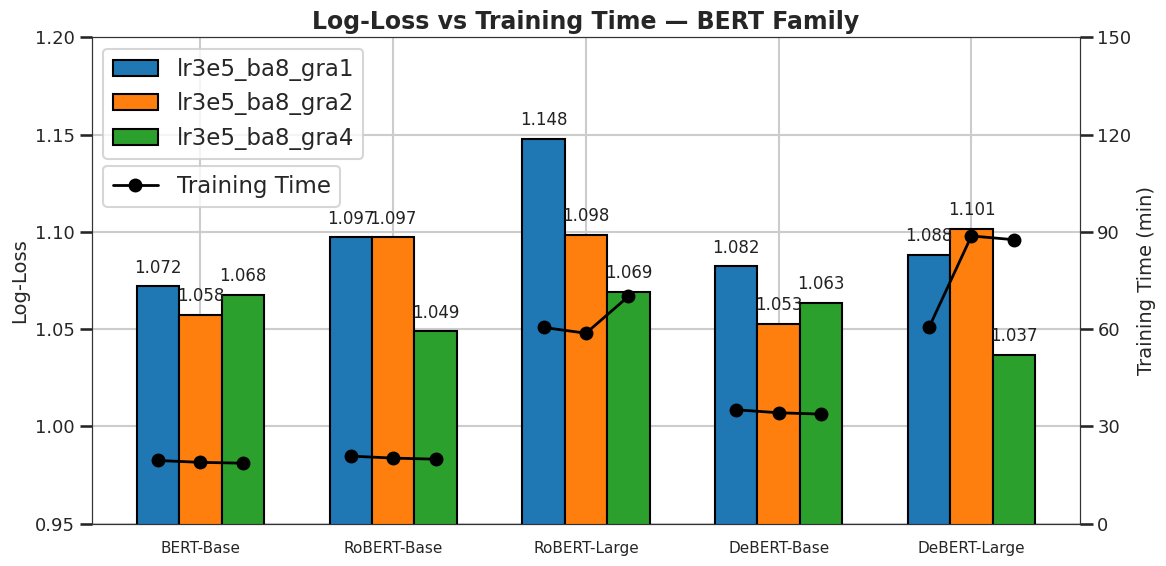

In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === 1. Load CSV ===
df = pd.read_csv("metrics_bert2.csv")

# === 1.1 Convert Time (seconds → minutes) ===
df["Time"] = df["Time"] / 60.0

# === 2. Output folder ===
os.makedirs("plots", exist_ok=True)

# === 3. Ensure models in correct grouped order ===
model_order = [
    "BERT-Base",
    "RoBERT-Base",
    "RoBERT-Large",
    "DeBERT-Base",
    "DeBERT-Large"
]

param_order = ["lr3e5_ba8_gra1", "lr3e5_ba8_gra2", "lr3e5_ba8_gra4"]

df["Model"] = pd.Categorical(df["Model"], categories=model_order, ordered=True)
df["Parameters"] = pd.Categorical(df["Parameters"], categories=param_order, ordered=True)

df = df.sort_values(["Model", "Parameters"])

# === 4. Colors for sub-bars ===
param_colors = {
    "lr3e5_ba8_gra1": "#1f77b4",  # blue
    "lr3e5_ba8_gra2": "#ff7f0e",  # orange
    "lr3e5_ba8_gra4": "#2ca02c",  # green
}

# === 5. Grouped bar plotting function ===
def plot_metric(metric_name, ylabel, save_name):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    models = model_order
    x = np.arange(len(models))
    bar_width = 0.22

    # === Plot sub-bars and add text ===
    for i, param in enumerate(param_order):
        subset = df[df["Parameters"] == param]

        bars = ax1.bar(
            x + (i - 1) * bar_width,
            subset[metric_name],
            width=bar_width,
            label=param,
            color=param_colors[param],
            edgecolor="black"
        )

        for bar in bars:
            h = bar.get_height()
            ax1.text(
                bar.get_x() + bar.get_width() / 2,
                h + 0.005,
                f"{h:.3f}",
                ha="center",
                va="bottom",
                fontsize=12,
                color="#222222"
            )

    ax1.set_ylabel(ylabel, fontsize=14)
    ax1.set_xticks(x)
    ax1.set_xticklabels(models, ha="center")

    # === Metric-specific Y-limits ===
    if metric_name == "Accuracy":
        ax1.set_ylim(0.30, 0.55)
    elif metric_name == "F1-Score":
        ax1.set_ylim(0.00, 0.50)
    elif metric_name == "Log-Loss":
        ax1.set_ylim(0.95, 1.20)

    # === Secondary Axis: Training Time ===
    ax2 = ax1.twinx()
    ax2.grid(False)

    # time_vals[model][batch] → time in minutes
    time_vals = [
        [df[(df["Model"] == m) & (df["Parameters"] == p)]["Time"].values[0]
         for p in param_order]
        for m in models
    ]

    # === Plot one polyline per model ===
    for i, m in enumerate(models):
        center = (len(param_order) - 1) / 2
        x_offsets = [i + (j - center) * bar_width for j in range(len(param_order))]

        label = "Training Time" if i == 0 else None
        ax2.plot(
            x_offsets,
            time_vals[i],
            marker="o",
            linewidth=2,
            color="black",
            label=label
        )

    ax2.set_ylabel("Training Time (min)", fontsize=14)
    
    # === Set y-axis range for time ===    
    ax2.set_yticks(range(0, 151, 30))

    # === Title ===
    plt.title(f"{metric_name} vs Training Time — BERT Family", fontsize=17, weight="bold")

    # === Legends ===
    ax1.legend(loc="upper left", bbox_to_anchor=(0, 1.00))
    ax2.legend(loc="upper left", bbox_to_anchor=(0, 0.76))
    fig.tight_layout()

    save_path = f"plots/{save_name}.png"
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    print(f"✅ Saved: {save_path}")

# === 6. Generate plots ===
plot_metric("Accuracy", "Accuracy", "BERT_Accuracy_Comparison")
plot_metric("F1-Score", "F1-Score", "BERT_F1_Comparison")
plot_metric("Log-Loss", "Log-Loss", "BERT_Loss_Comparison")

✅ Saved: plots/BERT_Accuracy_Comparison.png
✅ Saved: plots/BERT_F1_Comparison.png
✅ Saved: plots/BERT_Loss_Comparison.png


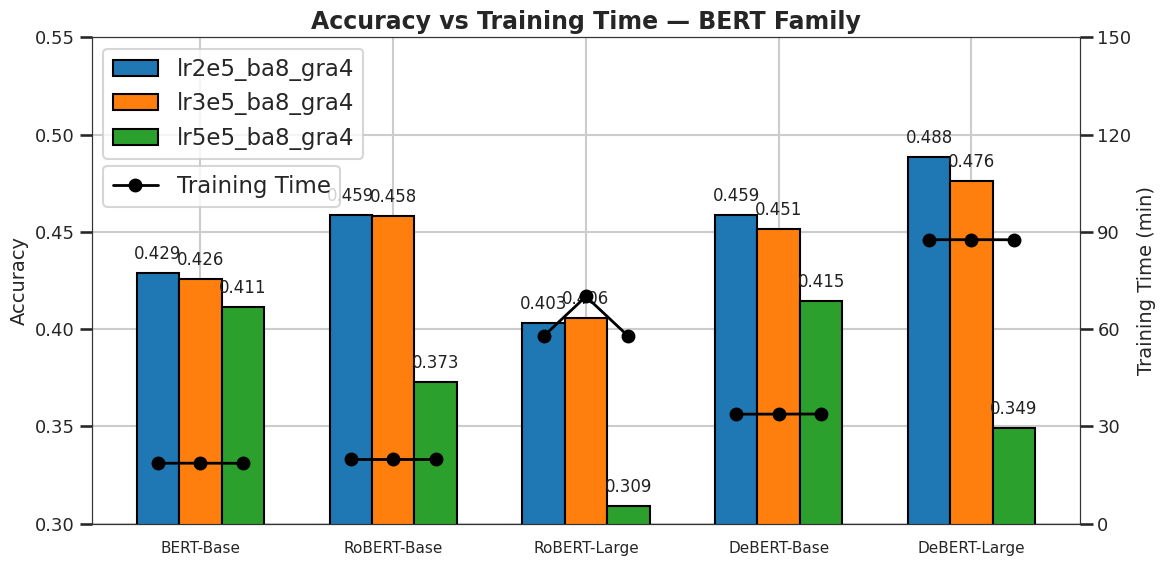

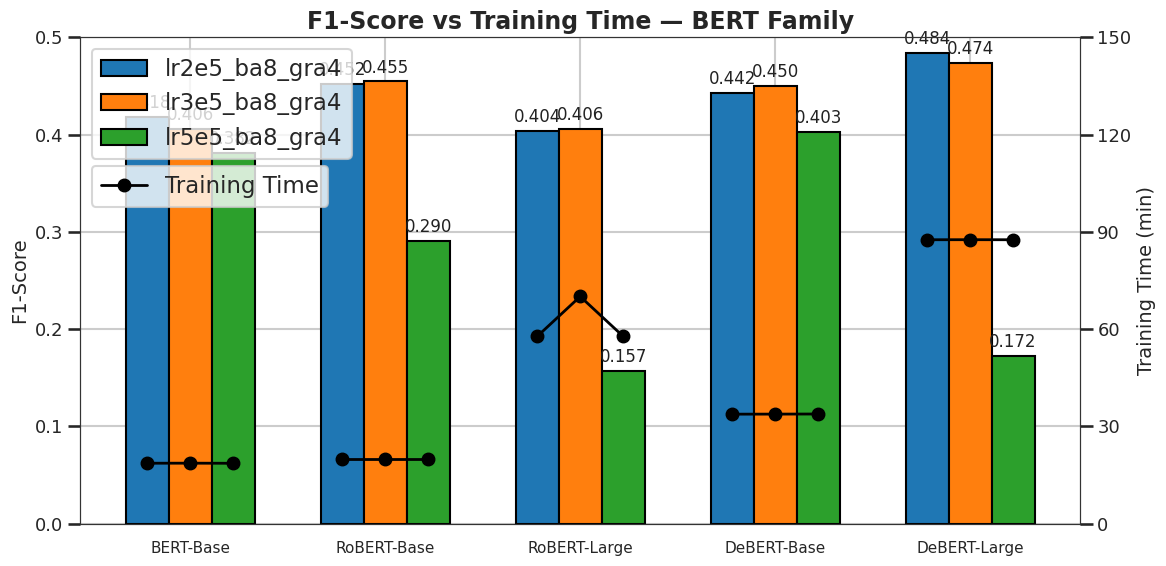

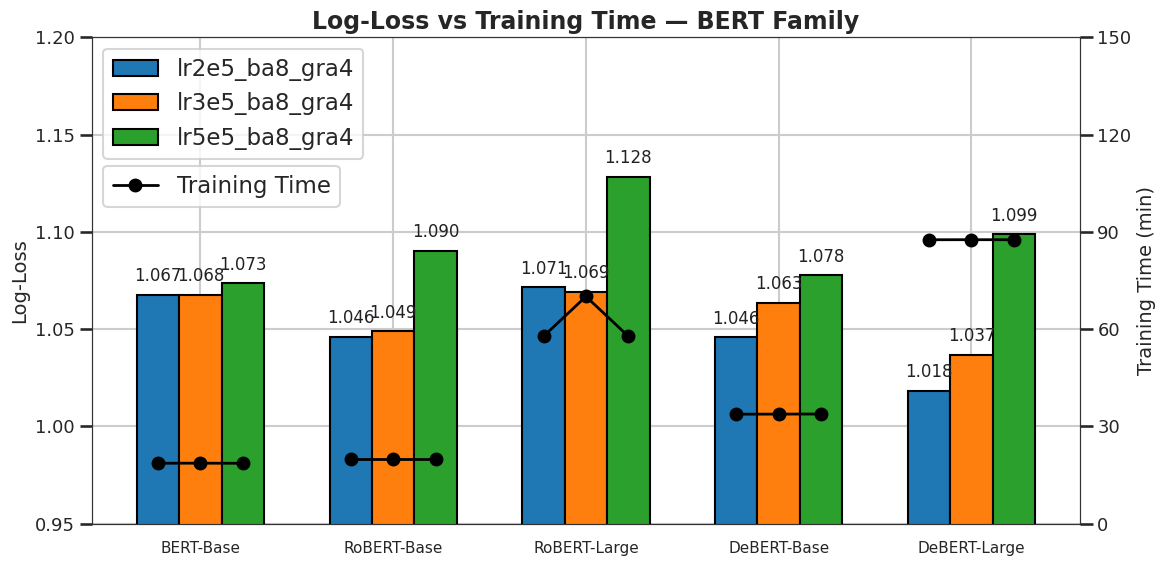

In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === 1. Load CSV ===
df = pd.read_csv("metrics_bert3.csv")

# === 1.1 Convert Time (seconds → minutes) ===
df["Time"] = df["Time"] / 60.0

# === 2. Output folder ===
os.makedirs("plots", exist_ok=True)

# === 3. Ensure models in correct grouped order ===
model_order = [
    "BERT-Base",
    "RoBERT-Base",
    "RoBERT-Large",
    "DeBERT-Base",
    "DeBERT-Large"
]

param_order = ["lr2e5_ba8_gra4", "lr3e5_ba8_gra4", "lr5e5_ba8_gra4"]

df["Model"] = pd.Categorical(df["Model"], categories=model_order, ordered=True)
df["Parameters"] = pd.Categorical(df["Parameters"], categories=param_order, ordered=True)

df = df.sort_values(["Model", "Parameters"])

# === 4. Colors for sub-bars ===
param_colors = {
    "lr2e5_ba8_gra4": "#1f77b4",  # blue
    "lr3e5_ba8_gra4": "#ff7f0e",  # orange
    "lr5e5_ba8_gra4": "#2ca02c",  # green
}

# === 5. Grouped bar plotting function ===
def plot_metric(metric_name, ylabel, save_name):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    models = model_order
    x = np.arange(len(models))
    bar_width = 0.22

    # === Plot sub-bars and add text ===
    for i, param in enumerate(param_order):
        subset = df[df["Parameters"] == param]

        bars = ax1.bar(
            x + (i - 1) * bar_width,
            subset[metric_name],
            width=bar_width,
            label=param,
            color=param_colors[param],
            edgecolor="black"
        )

        for bar in bars:
            h = bar.get_height()
            ax1.text(
                bar.get_x() + bar.get_width() / 2,
                h + 0.005,
                f"{h:.3f}",
                ha="center",
                va="bottom",
                fontsize=12,
                color="#222222"
            )

    ax1.set_ylabel(ylabel, fontsize=14)
    ax1.set_xticks(x)
    ax1.set_xticklabels(models, ha="center")

    # === Metric-specific Y-limits ===
    if metric_name == "Accuracy":
        ax1.set_ylim(0.30, 0.55)
    elif metric_name == "F1-Score":
        ax1.set_ylim(0.00, 0.50)
    elif metric_name == "Log-Loss":
        ax1.set_ylim(0.95, 1.20)

    # === Secondary Axis: Training Time ===
    ax2 = ax1.twinx()
    ax2.grid(False)

    # time_vals[model][batch] → time in minutes
    time_vals = [
        [df[(df["Model"] == m) & (df["Parameters"] == p)]["Time"].values[0]
         for p in param_order]
        for m in models
    ]

    # === Plot one polyline per model ===
    for i, m in enumerate(models):
        center = (len(param_order) - 1) / 2
        x_offsets = [i + (j - center) * bar_width for j in range(len(param_order))]

        label = "Training Time" if i == 0 else None
        ax2.plot(
            x_offsets,
            time_vals[i],
            marker="o",
            linewidth=2,
            color="black",
            label=label
        )

    ax2.set_ylabel("Training Time (min)", fontsize=14)
    
    # === Set y-axis range for time ===    
    ax2.set_yticks(range(0, 151, 30))

    # === Title ===
    plt.title(f"{metric_name} vs Training Time — BERT Family", fontsize=17, weight="bold")

    # === Legends ===
    ax1.legend(loc="upper left", bbox_to_anchor=(0, 1.00))
    ax2.legend(loc="upper left", bbox_to_anchor=(0, 0.76))
    fig.tight_layout()

    save_path = f"plots/{save_name}.png"
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    print(f"✅ Saved: {save_path}")

# === 6. Generate plots ===
plot_metric("Accuracy", "Accuracy", "BERT_Accuracy_Comparison")
plot_metric("F1-Score", "F1-Score", "BERT_F1_Comparison")
plot_metric("Log-Loss", "Log-Loss", "BERT_Loss_Comparison")